# **Indian Airlines Ticket Price Analysis**
- Defining the problem statement
- Collecting the data
- Exploratory data analysis

## **1) Problem Statment**


##### In this project, we study the data which is in tabular format using various Python libraries like Pandas, Numpy, Matplotlib and Seaborn.

##### We study different columns of the table and try to co-relate them with others and find a relation between those two.

##### We try to find and analyze those key factors like class of travel, duration of fight, etc. which helps us understand the pricing of tickets to plan and schedule our air travel in efficient way

In [5]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **2) Collecting the data**

Import the reqiured Python Libraries


In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading dataset using Pandas

In [9]:
df = pd.read_csv(r"Clean_Dataset.csv")
df.head() #Viewing a first few rows of the dataset using head function

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### **Features**
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

#Checking the number of unique value in the columns of the dataset

In [10]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

#Checking the number of rows and columns in the dataset

In [11]:
df.shape

(300153, 12)

#Checking feature information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


#Checking statistics such as mean, standard deviation, minimum and maximum values

In [13]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


#Checking the  of unique value in the columns of the dataset

In [14]:
for col in df:
    if df[col].dtype == 'object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


### About the columns:
1. In airline column there are 6 unique airlines:- SpiceJet, AirAsia, Vistara, GO_FIRST, Indigo, Air_India  
2. In source_city & destination_city there are 6 unique cities- Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai 
3. In arrival & departure columns there are 6 different timings:- Morning, Early_Morning, Afternoon, Evening, Night, Late_Night 
4. In class column there are 2 different classes: Economy, Business

## **2) Exploratory Data Analysis**

**Q1) Number of flights operated by each of the airlines?**

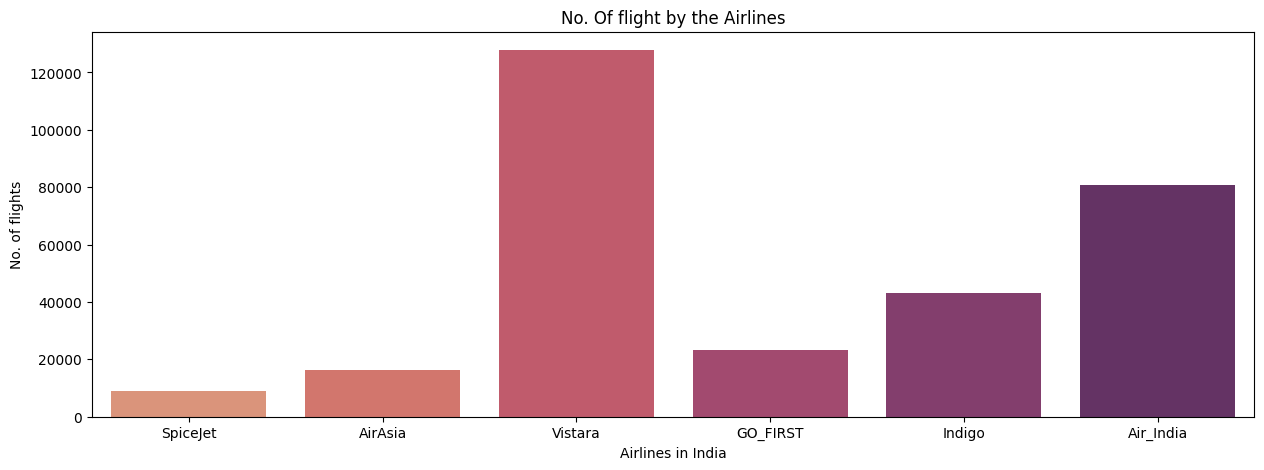

In [15]:
from turtle import title

plt.figure(figsize=(15,5))
NFO = sns.countplot(x='airline', data=df, palette='flare')
NFO.set(xlabel="Airlines in India", ylabel="No. of flights", title="No. Of flight by the Airlines")
plt.show(NFO)

From the above figure, we can see the "Nistara" airlines have maximum no. of flights followed by the "Air India" while "SpiceJet" has minmum no. of flights.


**Q2) What is the cost variation for different travel classes?**

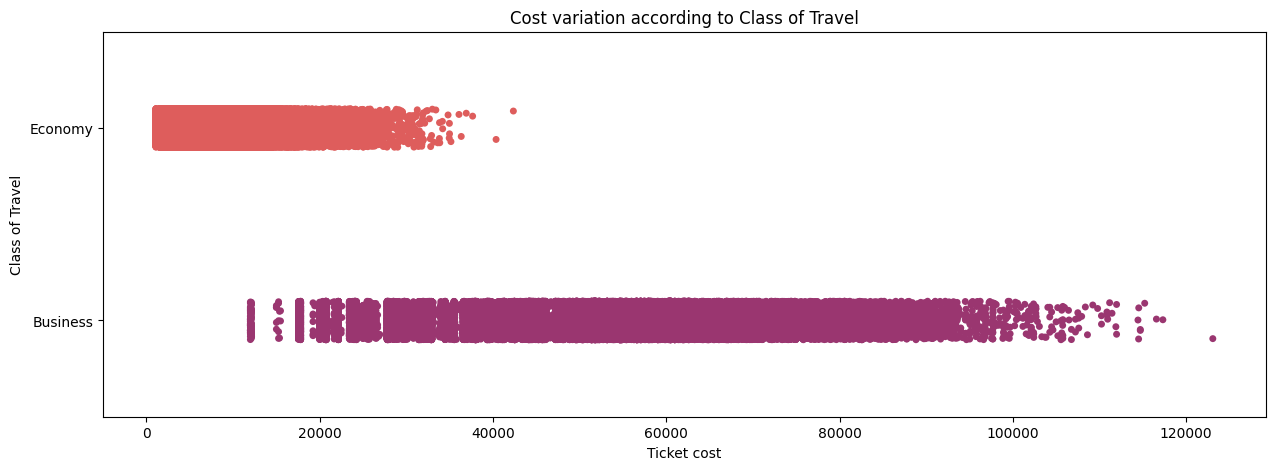

In [16]:
from turtle import title

plt.figure(figsize=(15,5))
CV = sns.stripplot(x='price', y='class', data = df, palette='flare')
CV.set(xlabel='Ticket cost', ylabel='Class of Travel', title='Cost variation according to Class of Travel')
plt.show(CV)

From the above figure, we can see "Economy" class tickets usually cost between 2000 - 30000 while "Business" class tickets usually cost between 25000-90000

**Q3) What is the ticket availability for different travel classes?**

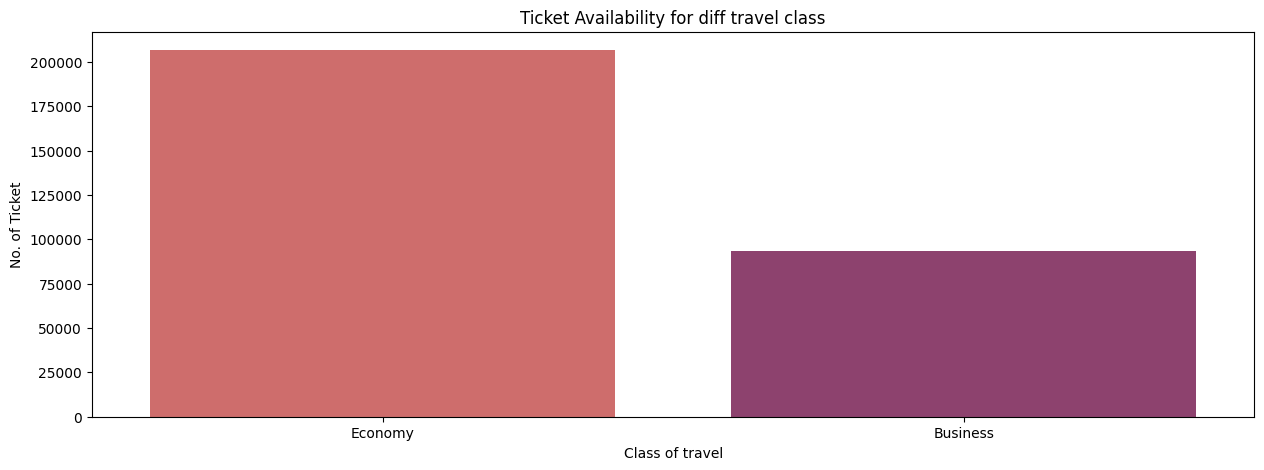

In [17]:
from turtle import title
plt.figure(figsize=(15,5))
TA = sns.countplot(x="class", data=df, palette='flare')
TA.set(xlabel="Class of travel",ylabel="No. of Ticket", title="Ticket Availability for diff travel class")
plt.show(TA)

From the above fiigure, we can see the ticket availability of "Economy" tickets is twice to the availability of "Business" class tickets 

**Q4) What is the ticket availability for different travel classes according to the airline?**

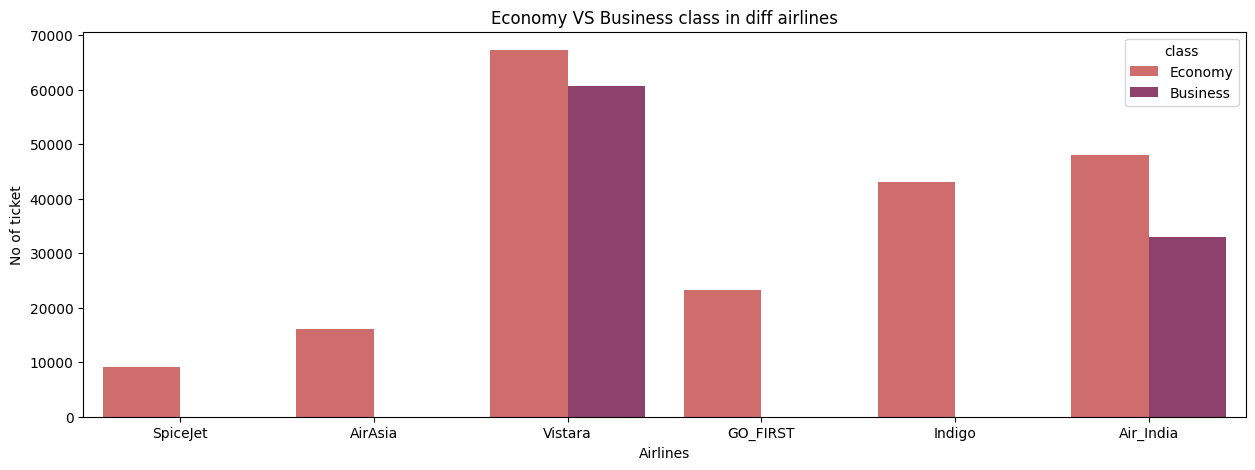

In [18]:
from turtle import title
plt.figure(figsize=(15,5))
TAA = sns.countplot(x='airline', hue='class', data=df, palette='flare')
TAA.set(xlabel="Airlines",ylabel="No of ticket", title="Economy VS Business class in diff airlines")
plt.show(TAA)

From the above figure, we can see that only 2 flights "Vistara" and "Air India" provides "business" class while rest just provide "Economy" class

**Q5) How does the arrival time distribution vary across different destination cities?**

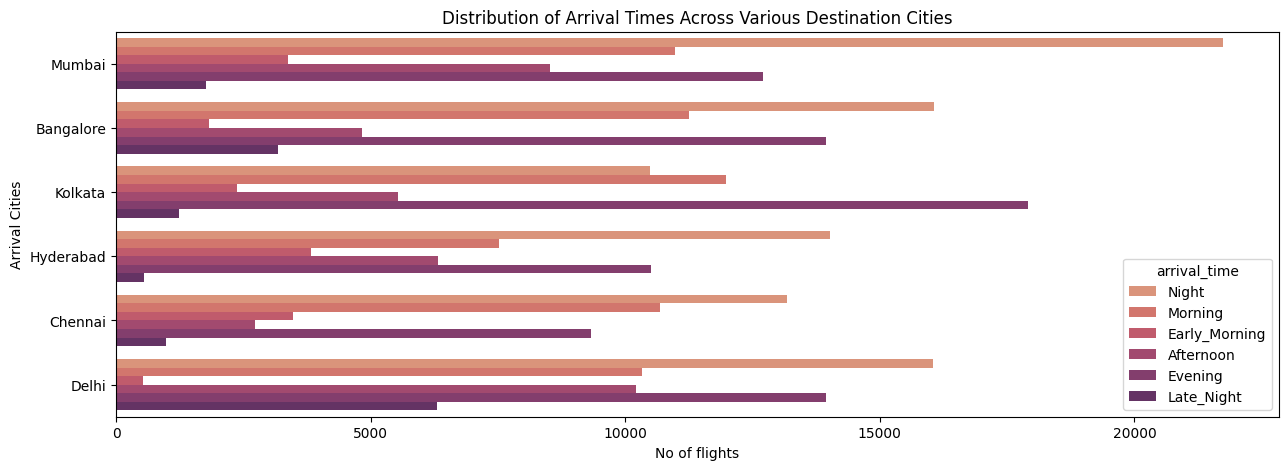

In [19]:
from turtle import title
plt.figure(figsize=(15,5))
TD = sns.countplot(y='destination_city', hue='arrival_time', data=df, palette='flare')
TD.set(xlabel="No of flights",ylabel="Arrival Cities", title="Distribution of Arrival Times Across Various Destination Cities")
plt.show(TD)

From the above figure, we can understand that maximum of the flight arrival at night in the "Mumbai " city while least no of flight arrival at early morning in "Delhi"


**Q6) How does the depature time distribution vary across different arrival cities?**

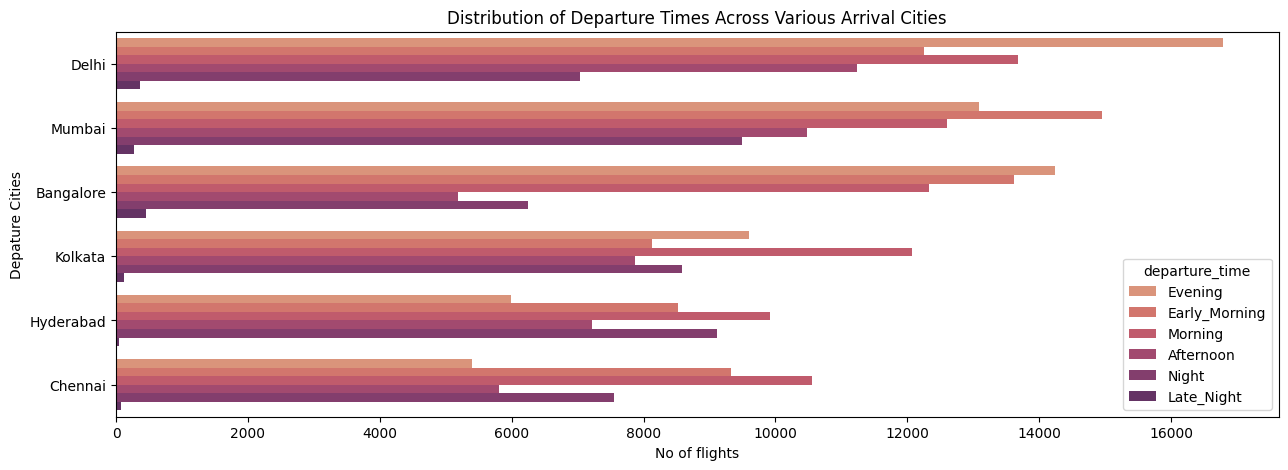

In [20]:
from turtle import title
plt.figure(figsize=(15,5))
TAA = sns.countplot(y='source_city', hue='departure_time', data=df, palette='flare')
TAA.set(xlabel="No of flights",ylabel="Depature Cities", title="Distribution of Departure Times Across Various Arrival Cities")
plt.show(TAA)

From the above figure, we can understand that maximum of the flight depature at evening in the "Delhi" city while least no of flight depature at late nights in "Hyderabad"

**Q7) What is price of ticket for different airlines based on destination?**

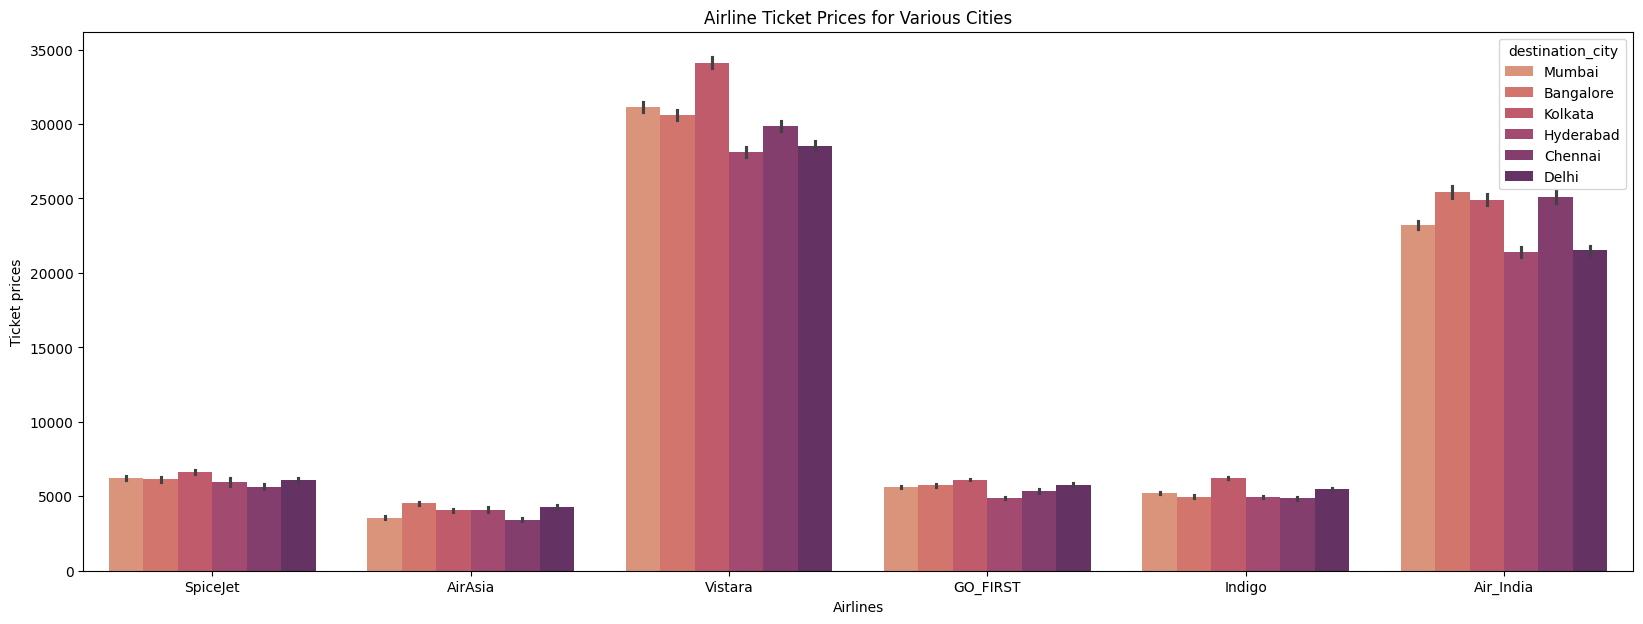

In [21]:
from turtle import title

plt.figure(figsize=(20,7))
TDD = sns.barplot(x="airline", y="price", hue="destination_city", data=df, palette='flare')
TDD.set(xlabel='Airlines', ylabel='Ticket prices', title='Airline Ticket Prices for Various Cities')
plt.show(TDD)

From the above figure, we can see the flight to Kolkate in "Vistara" airline has the highest ticket price followed but the Banglore city in "Air India" while Chennai city in "AirAisa" airlines has the cheapest ticket prices.

**Q8) What is price of ticket for different airlines based on duration of flight?**

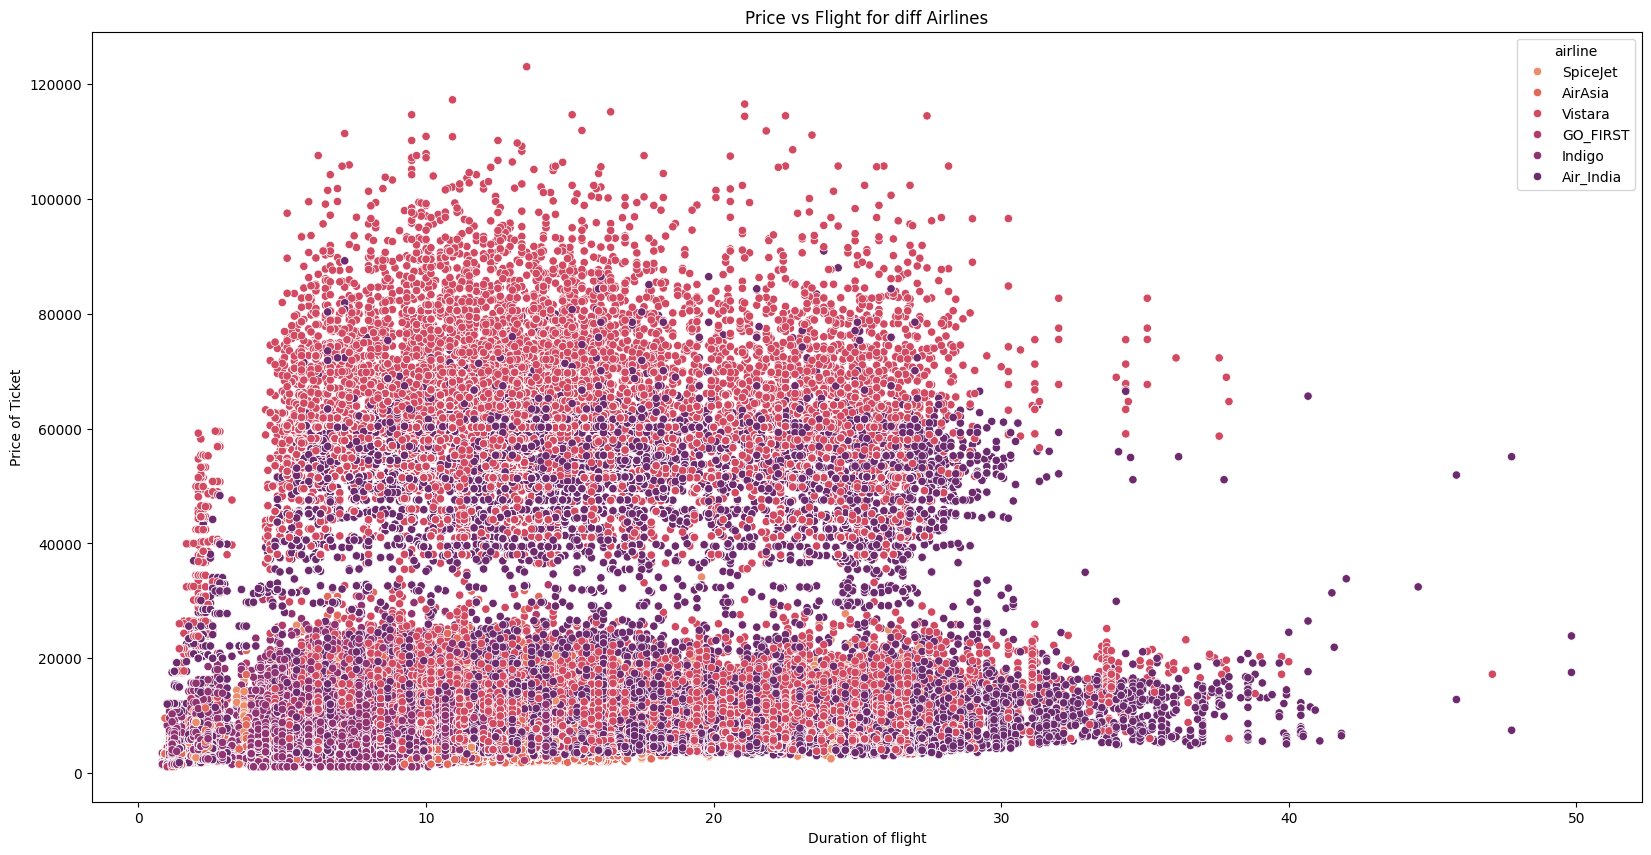

In [22]:
from turtle import title

plt.figure(figsize=(20,10))
TDA = sns.scatterplot(x="duration", y="price",hue="airline", data=df, palette='flare')
TDA.set(xlabel='Duration of flight', ylabel="Price of Ticket", title="Price vs Flight for diff Airlines")
plt.show(TDA)

From the above figure, we see the distribution of ticket price varying with duration of flight. More no. of green and brown points in the figure is explained by the fact that 'Vistara' and 'Air India' have maximum no. of flights.

**Q9) How do airline ticket prices vary depending on when you buy them?**

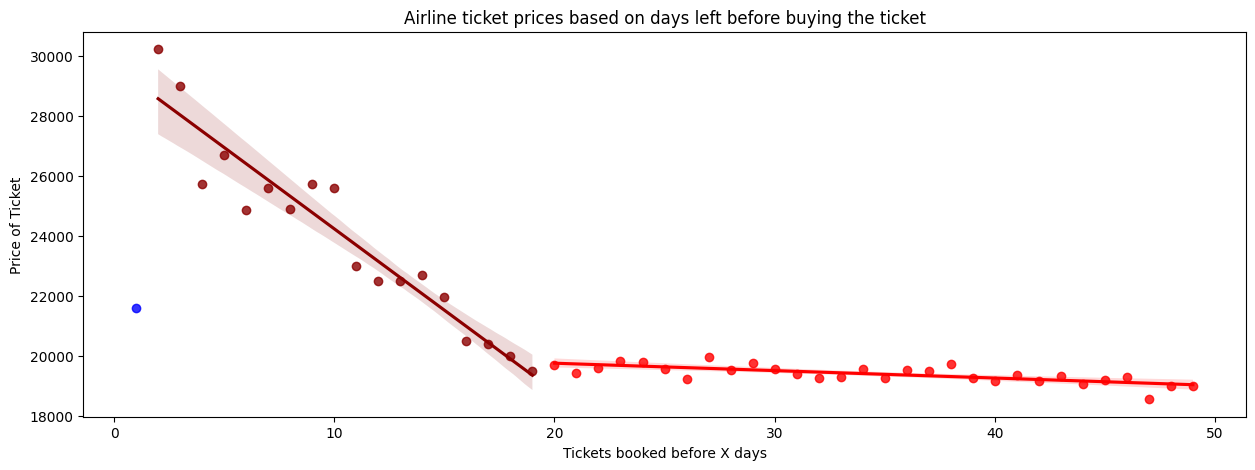

In [23]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x = df_temp.loc[df_temp['days_left'] == 1].days_left, y = df_temp.loc[df_temp['days_left'] == 1].price, data= df_temp, fit_reg= False, ax=ax, color = 'blue')
sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True, ax=ax, color = 'darkred')
sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True, ax=ax, color = 'red' )
ax.set(xlabel='Tickets booked before X days', ylabel='Price of Ticket', title='Airline ticket prices based on days left before buying the ticket')
plt.show(ax)

Based on the analysis, we can conclude that ticket prices gradually increase until 20 days before the flight. Beyond this period, prices rise sharply until the day before the flight, but drop dramatically on the last day. This trend is likely due to most people purchasing their tickets within 2-3 weeks before departure, which maximizes profits for airlines. On the final day, airlines reduce prices significantly to fill remaining seats, thereby increasing the load factor and reducing the operational cost per passenger.

**Q10) How does price of ticket vary depending on duration of flight?**

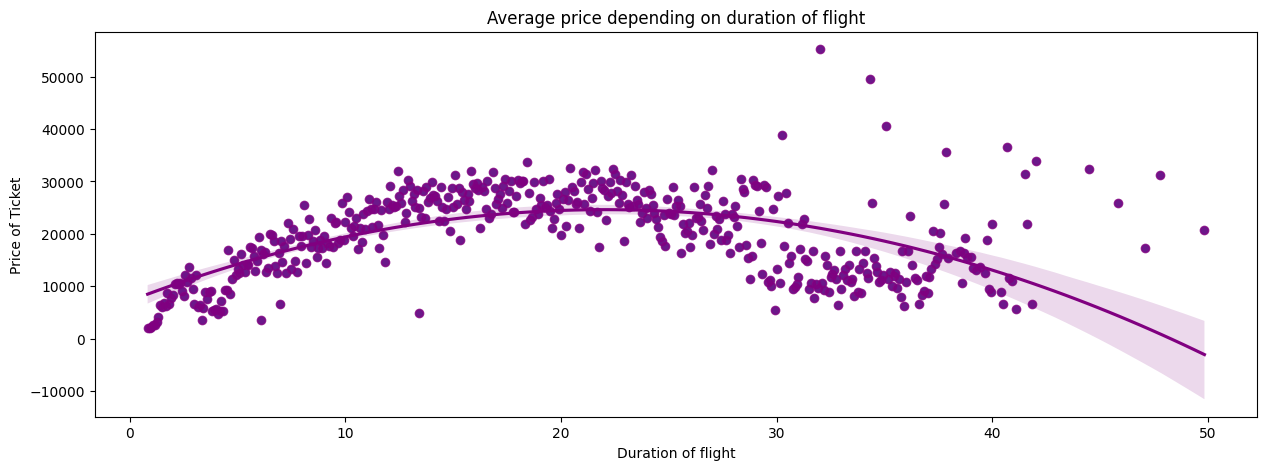

In [24]:
df_temp2 = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x='duration', y='price', data = df_temp2, palette='flare')
PD = sns.regplot(x='duration', y='price', data = df_temp2, order = 2, color='purple')
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Average price depending on duration of flight')
plt.show(PD)


From the above figure, we observe that the relationship between ticket prices and days left before the flight is not linear but can be approximated by a second-degree curve. There is a linear increase in prices as the number of days left decreases until about 20 days before the flight, followed by a sharp rise. Prices then drop dramatically just one day before the flight. Additionally, some outliers may be influencing the shape of the curve.

**Q11) How do airline ticket prices vary depending on when you buy them?**

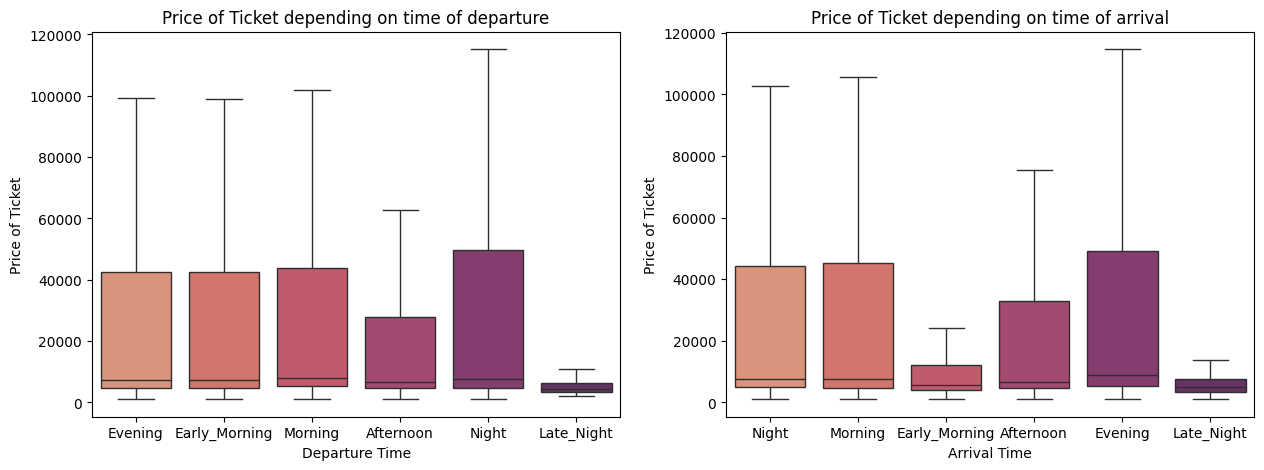

In [25]:
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
sns.boxplot(data = df, x = 'departure_time', y = 'price', showfliers = False,palette='flare').set(xlabel = 'Departure Time', ylabel = 'Price of Ticket', title ='Price of Ticket depending on time of departure')
plt.subplot (1,2,2)
sns.boxplot(data = df, x = 'arrival_time', y = 'price', showfliers =  False, palette='flare').set(xlabel = 'Arrival Time', ylabel = 'Price of Ticket', title = 'Price of Ticket depending on time of arrival')
plt.show()


From the above figure, we can conclude that flights departing late at night are the cheapest, while those arriving early in the morning and late at night are also relatively inexpensive. Additionally, flights departing in the afternoon tend to be cheaper as well.

**Q12) How does ticket price vary depending on source and destination?**

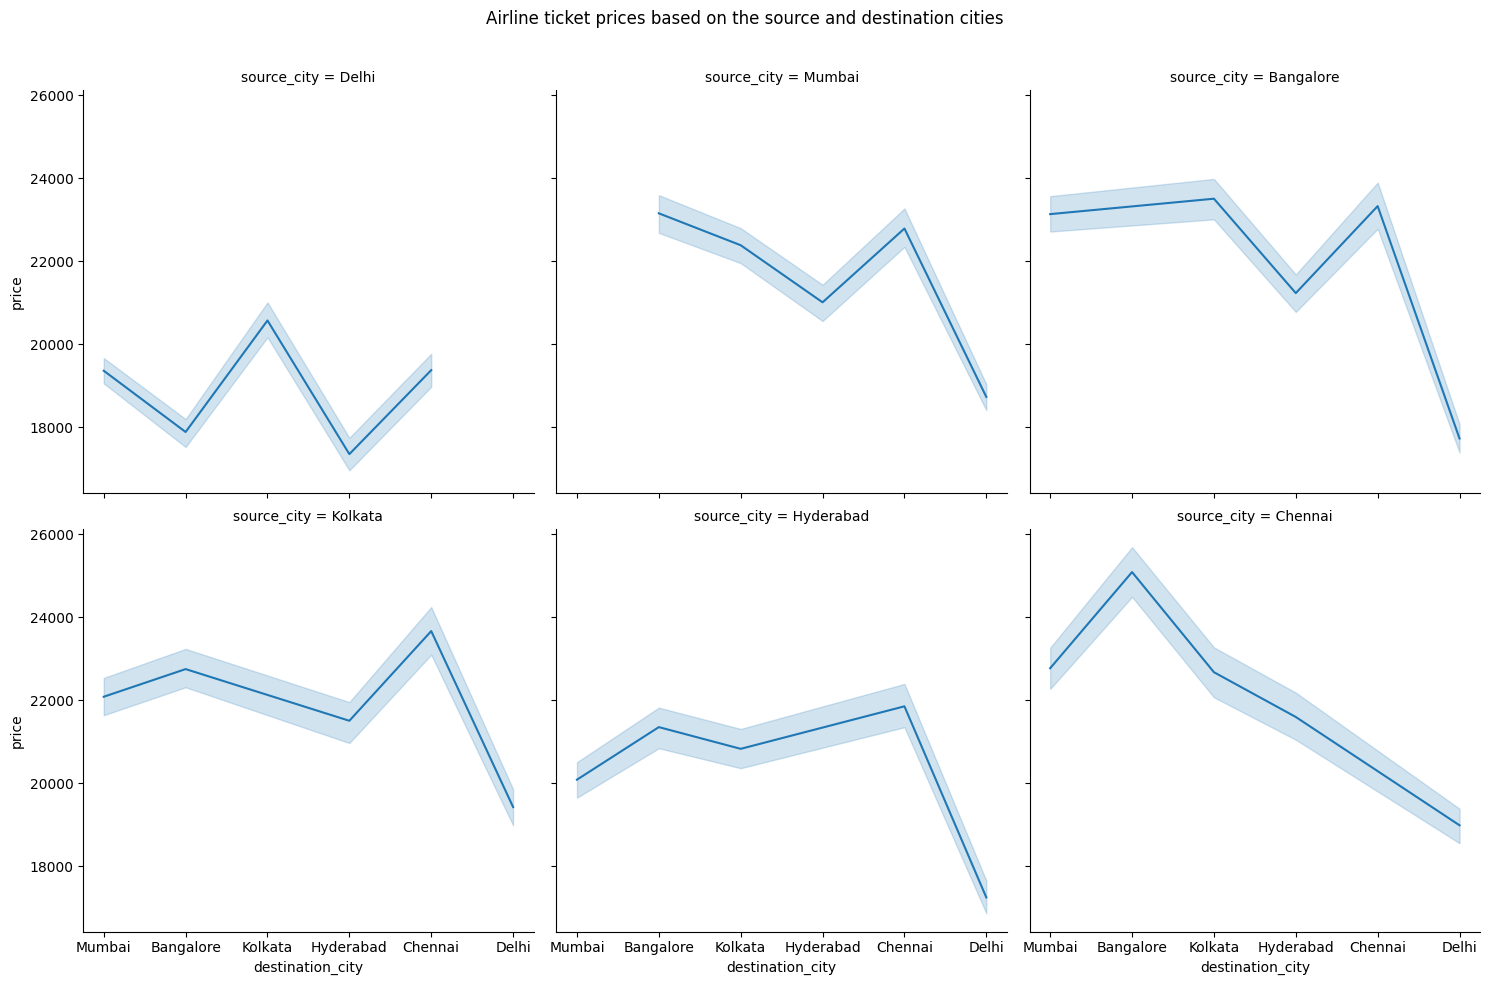

In [26]:
ax = sns.relplot(x = 'destination_city', y = 'price', col='source_city', col_wrap= 3, kind= 'line', data = df,palette='flare')
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline ticket prices based on the source and destination cities')
plt.show(ax)

From the above figure, we can conclude that flight departing from Delhi are usually cheaper which can be explained by the fact that Delhi being capital has very strong connectivity with every other city and more no. of freqencies resulting in cheaper ticket prices. Chennai-Bangalore seems to be the most expensive route to fly while Hyderabad is most expensive city to fly.

**Q13. How does price of tickets vary based on no. of stops and airline?**

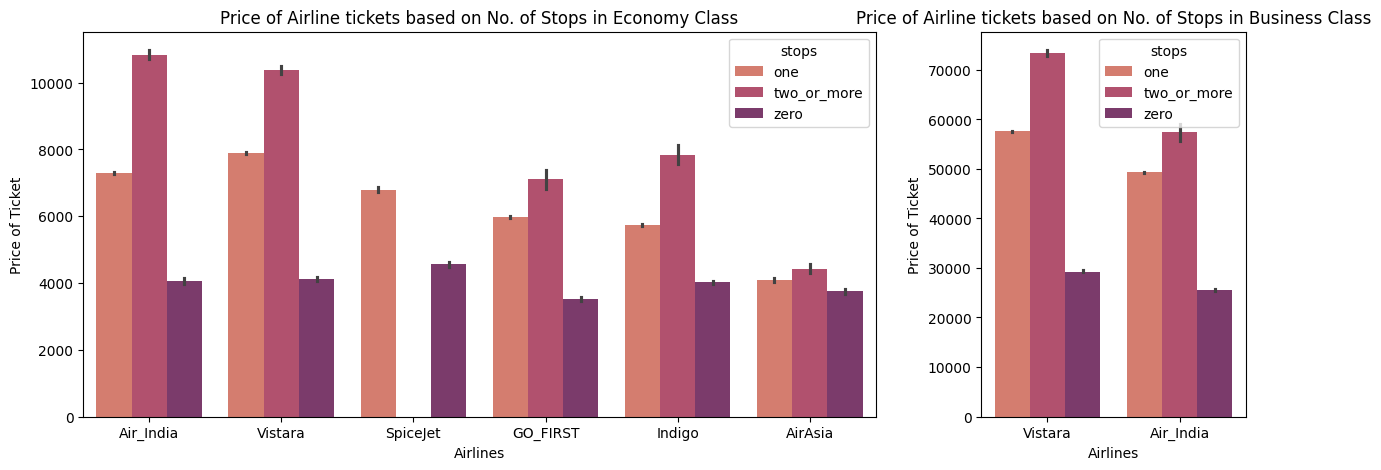

In [27]:
fig, axs = plt.subplots(1,2, gridspec_kw= {'width_ratios': [3,1]}, figsize = (15,5))
sns.barplot(y = 'price', x = 'airline', hue = 'stops', data = df.loc[df['class'] == 'Economy'].sort_values('price', ascending= False), ax = axs[0], palette='flare')
axs[0].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Economy Class')
sns.barplot(y='price', x='airline', hue='stops', data= df.loc[df['class'] == 'Business'].sort_values('price', ascending= False), ax = axs[1], palette='flare')
axs[1].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Business Class')
plt.show(fig, axs)

From the above figure, we can conclude that Non-Stop flights are generally the cheapest while One-Stop flights are more expensive and 2+ stop flights are most expensive which can be explained on basis that as one undertakes more flights to fly to destination, it costs more. 'Air Asia' seems to be an exception in this case which shows little variation in prices between its Non-Stop, One Stop and 2+ Stop flights.